In [53]:
# libraries
import csv
import numpy as np
import pandas as pd
from random import shuffle
import warnings
warnings.filterwarnings('ignore')

## 1. The Dataset: Adult Income Data

#### The Adult Income dataset is a classification dataset: it is used for a prediction task where the goal is to determine whether a person makes over 50k a year. The list of attributes is as follows:
- output variable: **Income**, <=50k and >50k (converted to 0 and 1 respectively)
- input features: 
    - **Age**: a continuous number
    - **WorkClass**: a categorical variable that represents different work sectors, including values such as Federal employee, Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked, Federal worker
    - **Education**: a categorical variable that represents the level of education, including values such as Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
    - **MaritalStatus**: a categorical variable with values Married-civ-spouse (Married to a civilian spouse), Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse (Married to someone in the Armed Forces) 
    - **Occupation**: a categorical variable with values Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
    - **EducationNum**: a continuous value that represents the level of education (0 = Preschool, 16 = Doctorate)
    - **Race**: a categorical variable with values White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black 
    - **Gender**: a binary variable, includes Female and Male
    - **CapitalGain**: a continuous number
    - **CapitalLoss**: a continuous number
    - **HoursPerWeek**: a categorical variable including hour ranges of 0-30, 30-60, 60-90, 90+
    - **NativeCountry**: a categorical variable including countries such as United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

In [59]:
# Load training data
df = pd.read_csv("Data/adult-train.csv")

df.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

def convert_hours(x):
    if x < 30:
        return "0-30"
    elif x < 60:
        return "30-60"
    elif x < 90:
        return "60-90"
    else:
        return "90+"

df['HoursPerWeek'] = df['HoursPerWeek'].apply(lambda x: convert_hours(x))

cols = [
        "Age", "WorkClass", "Education","EducationNum", "MaritalStatus", "Occupation", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]
df = df[cols]


train_cols = df.columns[0:-1]
label = df.columns[-1]
X_df = df[train_cols]
y_df = df[label]

X_display = X_df.copy()

#Converting strings to integers and floats for categorical data
categorical_cols = ["WorkClass", "Education", "MaritalStatus", "Occupation", "Race", "Gender", "NativeCountry", "HoursPerWeek"]

for col in categorical_cols:
    X_df[col] = pd.Categorical(X_df[col])
    X_df[col] = X_df[col].cat.codes


#Converting the response / output variable to a binary class
y_df = y_df.apply(lambda x: 0 if x == " <=50K" else 1)

# dataset = {
#         'X': X_df,
#         'y': y_df,
# }

#Top 5 rows of the original dataset:
df.head()

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,29,State-gov,Masters,14,Married-civ-spouse,Prof-specialty,Asian-Pac-Islander,Male,0,0,0-30,Taiwan,<=50K
1,54,Private,Some-college,10,Married-civ-spouse,Protective-serv,White,Male,0,0,30-60,United-States,>50K
2,37,Private,HS-grad,9,Married-civ-spouse,Craft-repair,White,Male,0,0,30-60,United-States,>50K
3,28,Private,Some-college,10,Married-civ-spouse,Adm-clerical,White,Female,0,0,0-30,United-States,<=50K
4,18,Private,11th,7,Never-married,Other-service,Black,Male,0,0,0-30,United-States,<=50K


In [60]:
# Load test data
df = pd.read_csv("Data/income_test_orig.csv")

df.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

def convert_hours(x):
    if x < 30:
        return "0-30"
    elif x < 60:
        return "30-60"
    elif x < 90:
        return "60-90"
    else:
        return "90+"

df['HoursPerWeek'] = df['HoursPerWeek'].apply(lambda x: convert_hours(x))

cols = [
        "Age", "WorkClass", "Education","EducationNum", "MaritalStatus", "Occupation", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]
df = df[cols]


train_cols = df.columns[0:-1]
label = df.columns[-1]
test_X_df = df[train_cols]
test_y_df = df[label]

test_X_display = test_X_df.copy()

#Converting strings to integers and floats for categorical data
categorical_cols = ["WorkClass", "Education", "MaritalStatus", "Occupation", "Race", "Gender", "NativeCountry", "HoursPerWeek"]

for col in categorical_cols:
    test_X_df[col] = pd.Categorical(test_X_df[col])
    test_X_df[col] = test_X_df[col].cat.codes


#Converting the response / output variable to a binary class
test_y_df = test_y_df.apply(lambda x: 0 if x == " <=50K" else 1)

dataset = {
        'X': test_X_df,
        'y': test_y_df,
}

#Top 5 rows of the original dataset:
df.head()

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Black,Male,0,0,30-60,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,30-60,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,0,30-60,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,30-60,United-States,>50K
4,18,?,Some-college,10,Never-married,?,White,Female,0,0,30-60,United-States,<=50K


# 2. The Model: LightGBM, with explanation tool SHAP

In [61]:
import shap
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

d_train = lgb.Dataset(X_df, label=y_df)
d_test = lgb.Dataset(test_X_df, label=test_y_df)

# train a lightgbm for the training dataset
model = lgb.train({}, d_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 32560, number of used features: 12
[LightGBM] [Info] Start training from score 0.240817


In [62]:
#Training accuracy
train_pred = model.predict(X_df).tolist()
train_pred = [0 if x<=0.5 else 1 for x in train_pred]
accuracy_train = round(sum(train_pred == y_df) / len(train_pred), 5)

#Test set accuracy
predictions = model.predict(test_X_df).tolist()
predictions = [0 if x <= 0.5 else 1 for x in predictions]

accuracy_test = round(sum(predictions == test_y_df) / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

indices = [index for index, value in enumerate(zip(predictions, test_y_df.tolist())) if value[0] != value[1]]
shuffle(indices)

The accuracy of the model on the training set is:  0.88317
The accuracy of the model on the test set is:  0.1858


### Global feature importance plot

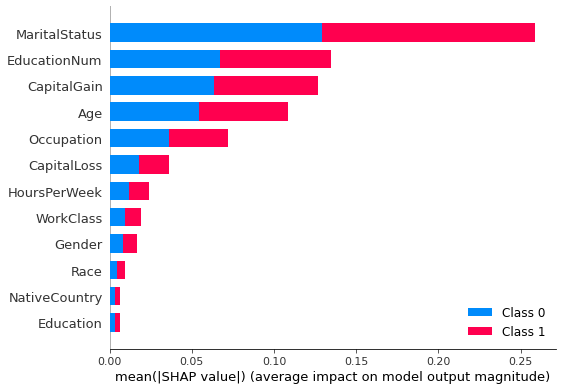

In [63]:
model.params['objective'] = 'binary'
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_df)
shap.summary_plot(shap_values, X_df, plot_type="bar")

### Individual features: partial dependence plots (PDP)

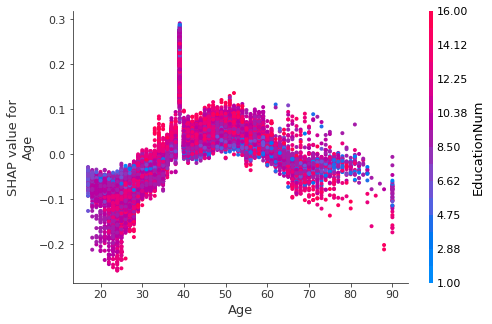

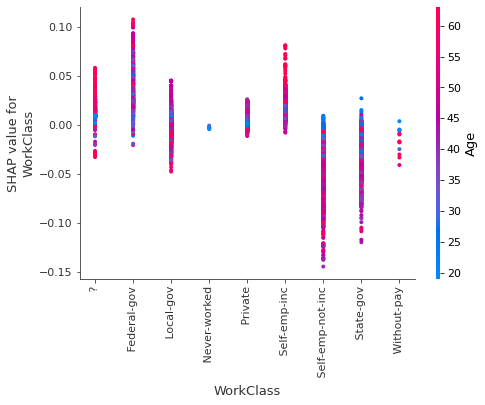

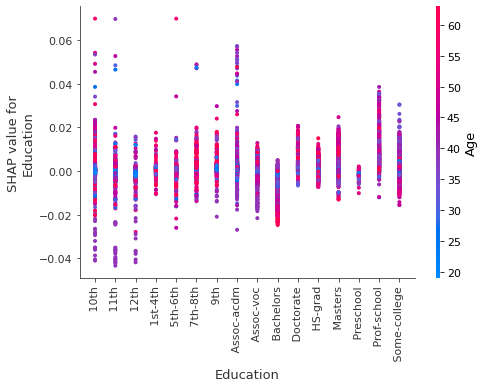

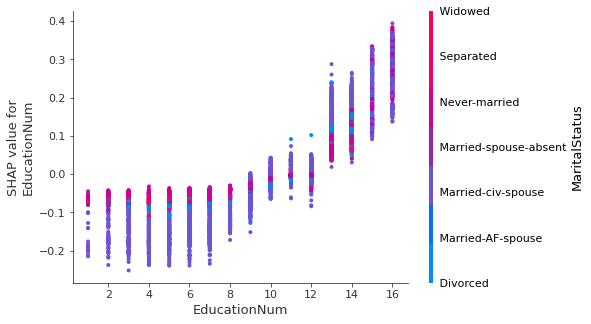

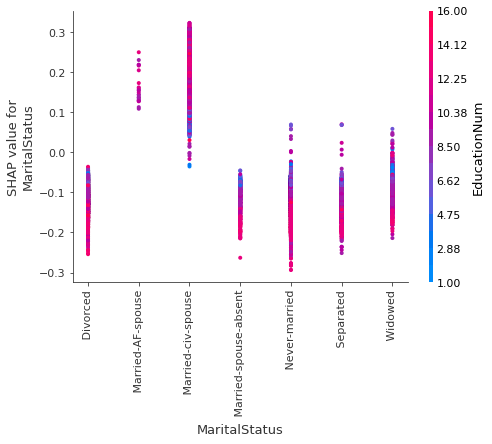

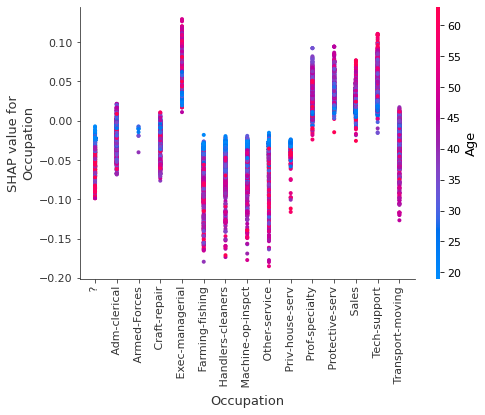

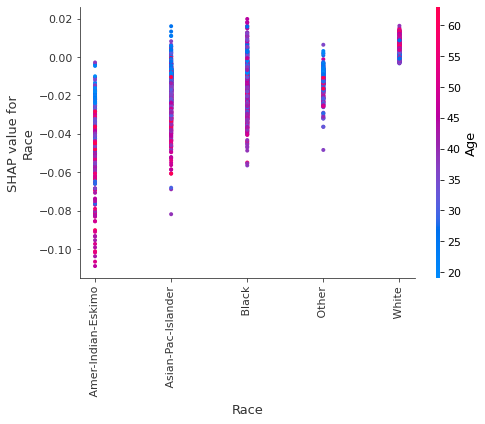

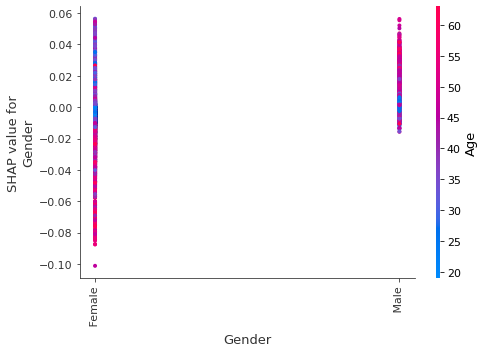

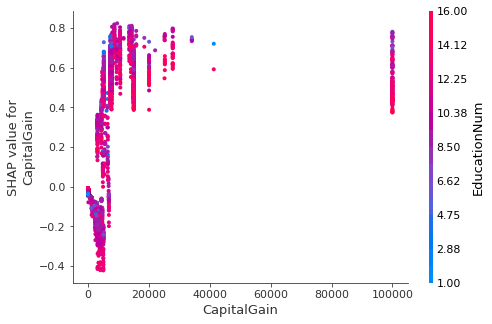

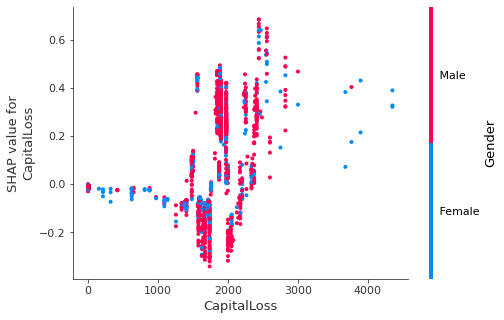

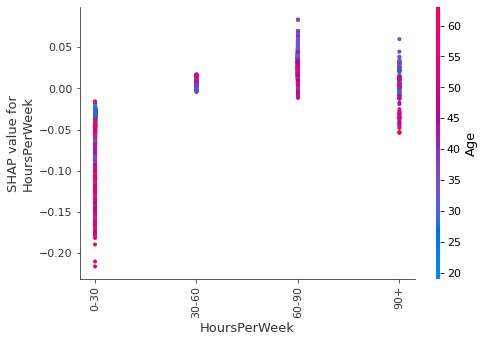

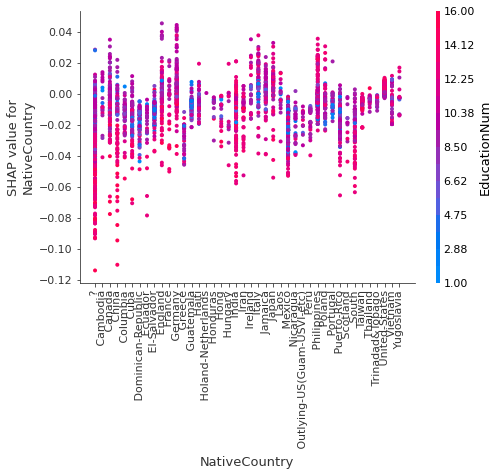

In [66]:
# Visualizing one feature here 
# shap.dependence_plot(X_df.columns[0], shap_values[1], X_df, display_features=X_display)

# VISUALIZE ALL INPUT FEATURES

for name in X_df.columns:
    shap.dependence_plot(name, shap_values[1], X_df, display_features=X_display)

### Local explanations

In [67]:
shap_values_test = explainer.shap_values(test_X_df)

def get_display_features(testidx):
    testcase = test_X_df.iloc[testidx, :]

    idx = dataset['X'].index[(dataset['X']['Age'] == testcase['Age']) & (dataset['X']['WorkClass'] == testcase['WorkClass']) & 
                     (dataset['X']['Education'] == testcase['Education']) & (dataset['X']['MaritalStatus'] == testcase['MaritalStatus']) &
                    (dataset['X']['EducationNum'] == testcase['EducationNum']) & 
                    (dataset['X']['Occupation'] == testcase['Occupation']) & 
                    (dataset['X']['Race'] == testcase['Race']) & (dataset['X']['Gender'] == testcase['Gender']) & 
                    (dataset['X']['CapitalGain'] == testcase['CapitalGain']) & (dataset['X']['CapitalLoss'] == testcase['CapitalLoss']) &
                    (dataset['X']['HoursPerWeek'] == testcase['HoursPerWeek']) & (dataset['X']['NativeCountry'] == testcase['NativeCountry'])
                    ]
    return idx

#Enter a test index you want to test
TEST_IDX = 10
idx = get_display_features(TEST_IDX)


In [68]:
shap.force_plot(explainer.expected_value[1], shap_values[1][TEST_IDX,:], X_display.iloc[idx[0],:])